# Pima Indian Diabetes Classifier using Xgboost

- No Parameter Tuning
- Goal: Using a Graphviz

## Ways to acquire explainability

- Decision Tree Visualization
- Feature Importance 
- PDP

- etc

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

import os

In [2]:
dataset = pd.read_csv('/diabetes.csv', 
                 delimiter = ',')

In [3]:
X = dataset.iloc[:, 0:(len(dataset.columns)-1)]
y = pd.DataFrame(dataset.iloc[:, len(dataset.columns)-1])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Learning
model = XGBClassifier()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

predictions

C:\Users\anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [5]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' %(accuracy * 100.0))

Accuracy: 75.97%


In [6]:
# Graphviz 패키지를 사용하기 위해, Graphviz를 설치한 경로를 OS 환경변수에 추가
os.environ['PATH'] += (os.pathsep + 'C:\\Users\\anaconda\\Anaconda3\\Library\\bin\\Graphviz')

## Tree Depth 3

Decision Tree

In [7]:
# XGBClassifier Decision Tree 시각화 
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 100, 200

plot_tree(model)
plt.show()

<Figure size 10000x20000 with 1 Axes>

Feature Importance

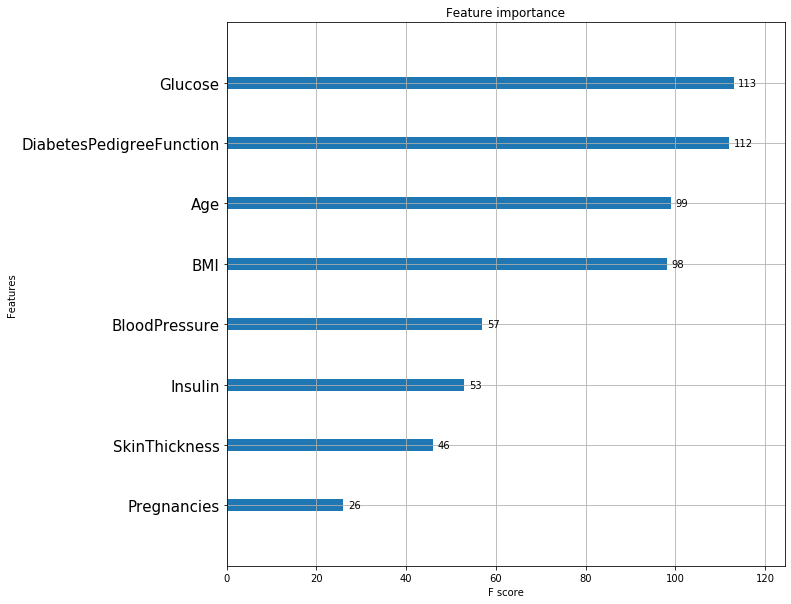

In [8]:
# XGB Feature Importance 시각화
from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10

plot_importance(model)

plt.yticks(fontsize=15)
plt.show()

## Tree Depth 4

In [9]:
model2 = XGBClassifier(max_depth=4)
model2.fit(X_train, y_train)

C:\Users\anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

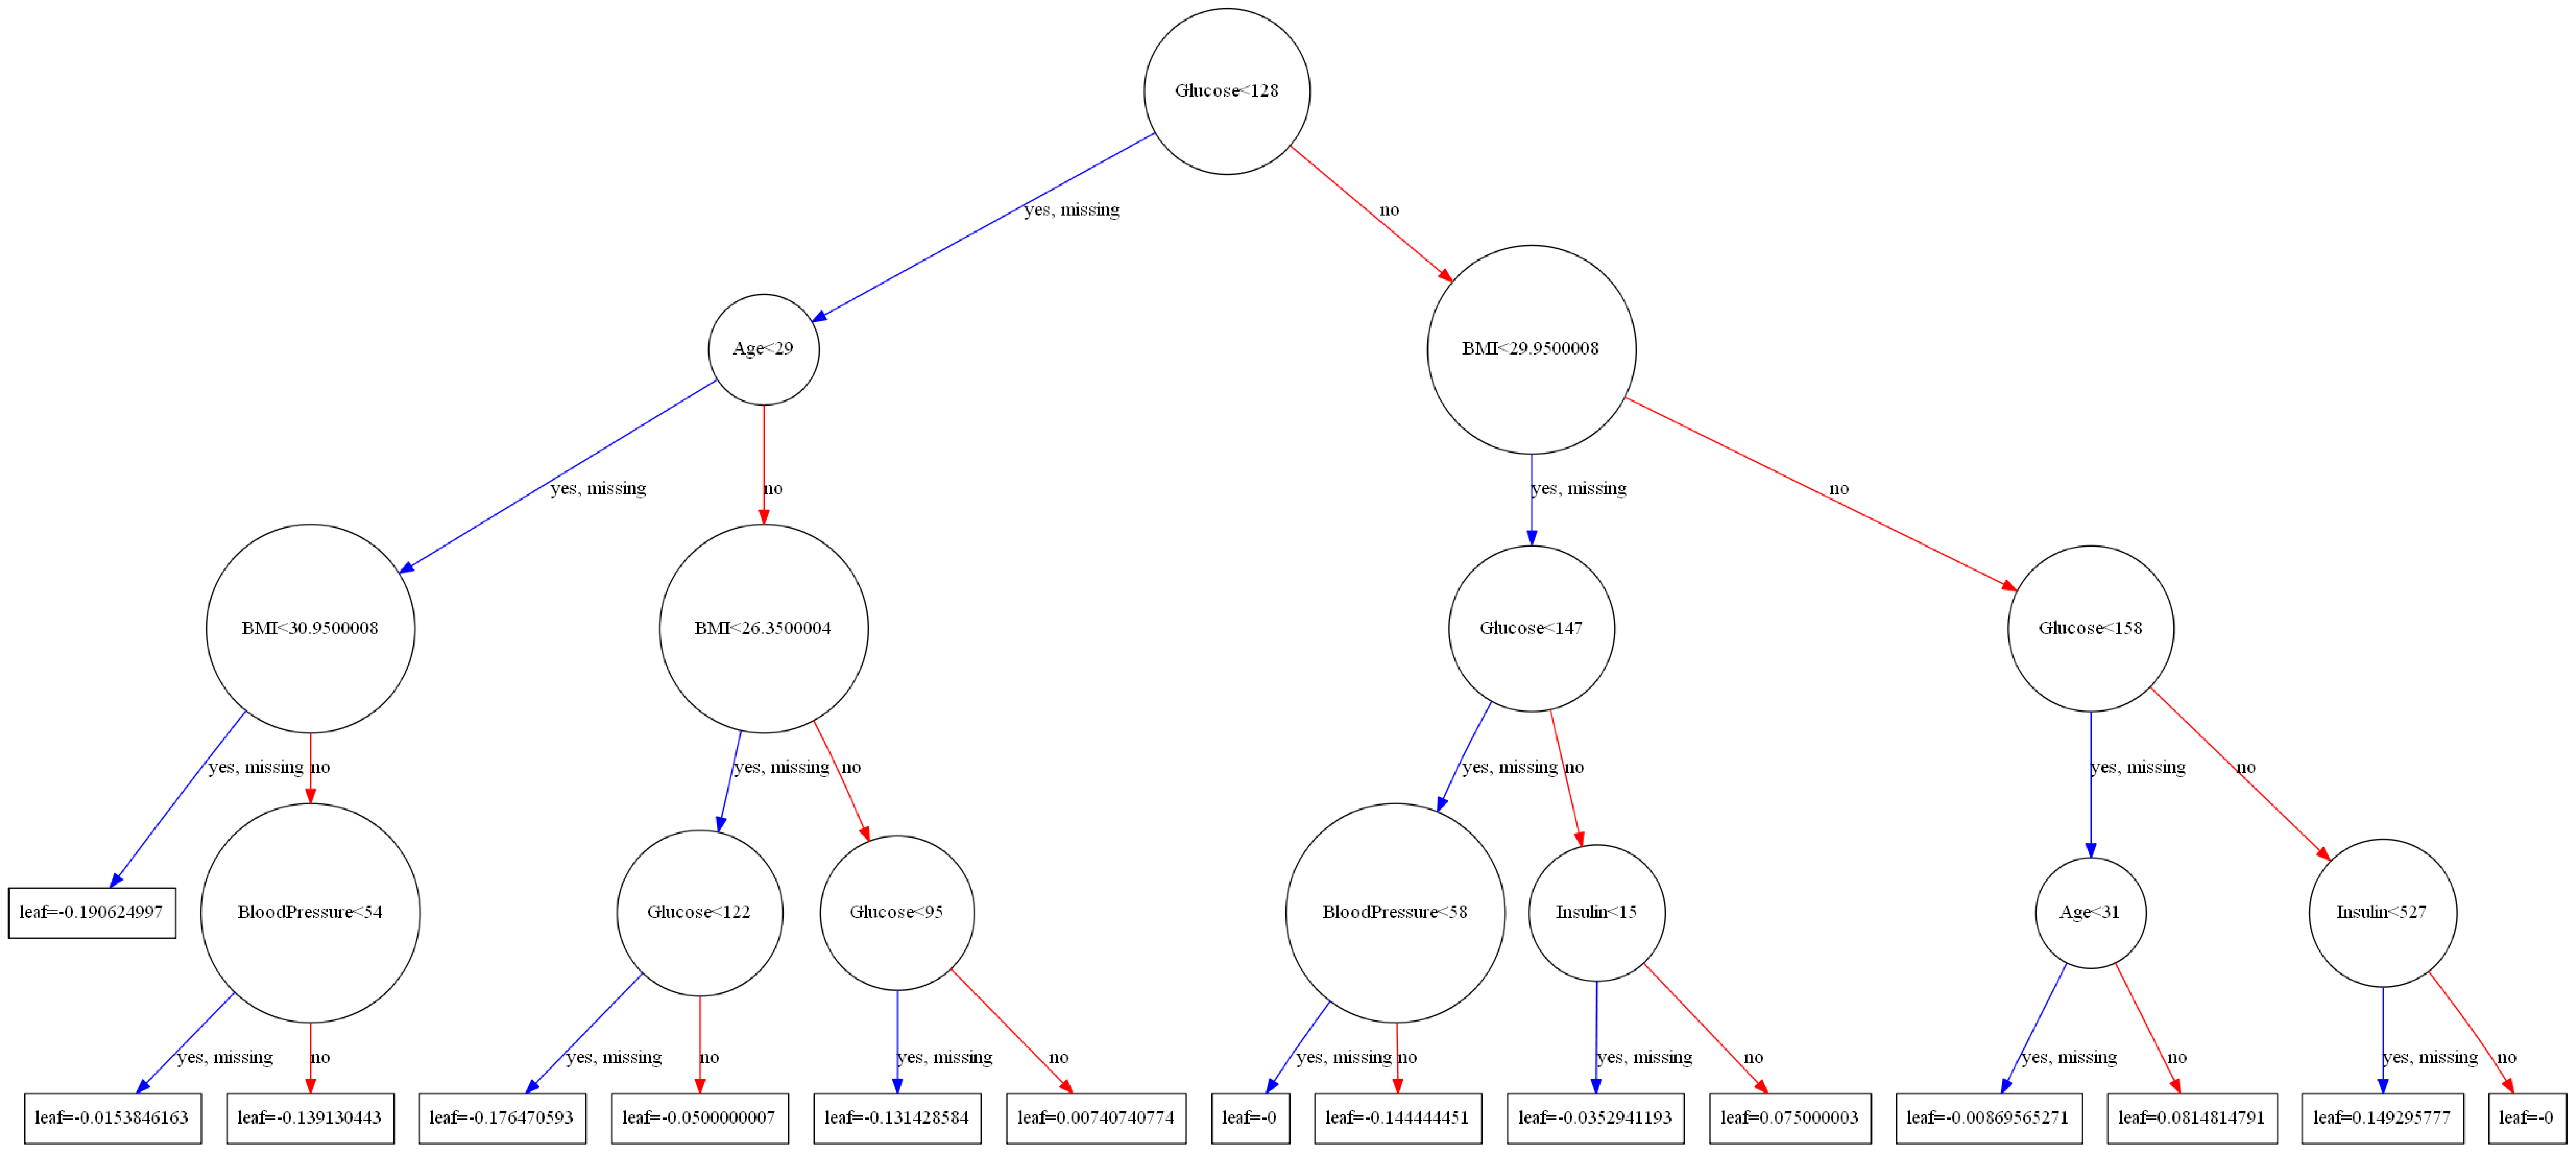

In [10]:
rcParams['figure.figsize'] = 100, 200

plot_tree(model2)
plt.show()

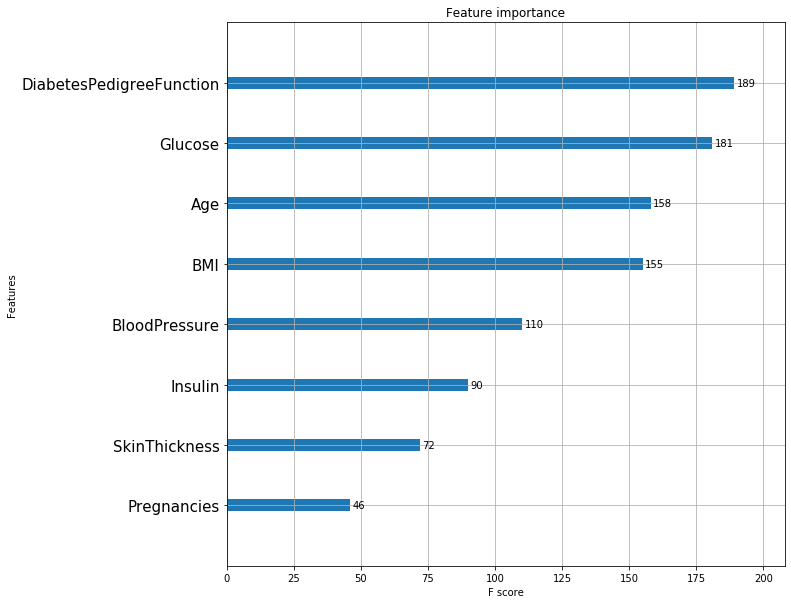

In [11]:
rcParams['figure.figsize'] = 10, 10

plot_importance(model2)

plt.yticks(fontsize=15)
plt.show()

The feature importances of max_depth=3 and max_depth=4 are different.

   ----

### PDP

- target_plot: No model, just data
- actual_plot: Model In!
- target_plot_interact
---
- pdp_plot
- pdp_interact

#### target_plot 

In [12]:
from pdpbox import info_plots

pima_data = dataset
pima_features = dataset.columns[0:8]
pima_target = dataset.columns[8]

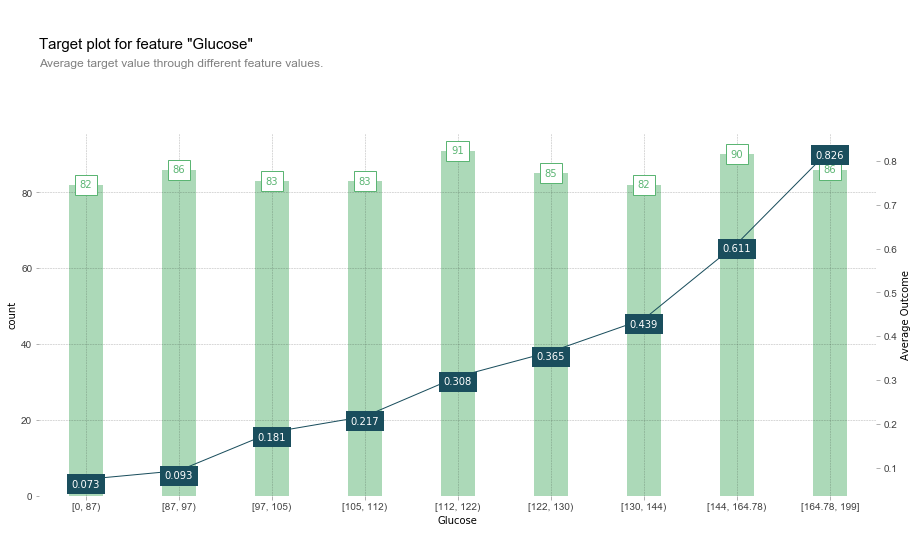

In [13]:
fig, axes, summary_df = info_plots.target_plot(
    df = pima_data,
    feature = 'Glucose',
    feature_name = 'Glucose',
    target = pima_target
)

As the level of Glucose increases, possibility of diabetes diagnosis increases. 

In [14]:
y.iloc[:,0].value_counts() # Frankly speaking, labels are not really proportional.

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
summary_df

,x,display_column,value_lower,value_upper,count,Outcome
0,0,"[0, 87)",0.000000,87.000000,82,0.073171
1,1,"[87, 97)",87.000000,97.000000,86,0.093023
2,2,"[97, 105)",97.000000,105.000000,83,0.180723
3,3,"[105, 112)",105.000000,112.000000,83,0.216867
4,4,"[112, 122)",112.000000,122.000000,91,0.307692
5,5,"[122, 130)",122.000000,130.000000,85,0.364706
6,6,"[130, 144)",130.000000,144.000000,82,0.439024
7,7,"[144, 164.78)",144.000000,164.777778,90,0.611111
8,8,"[164.78, 199]",164.777778,199.000000,86,0.825581


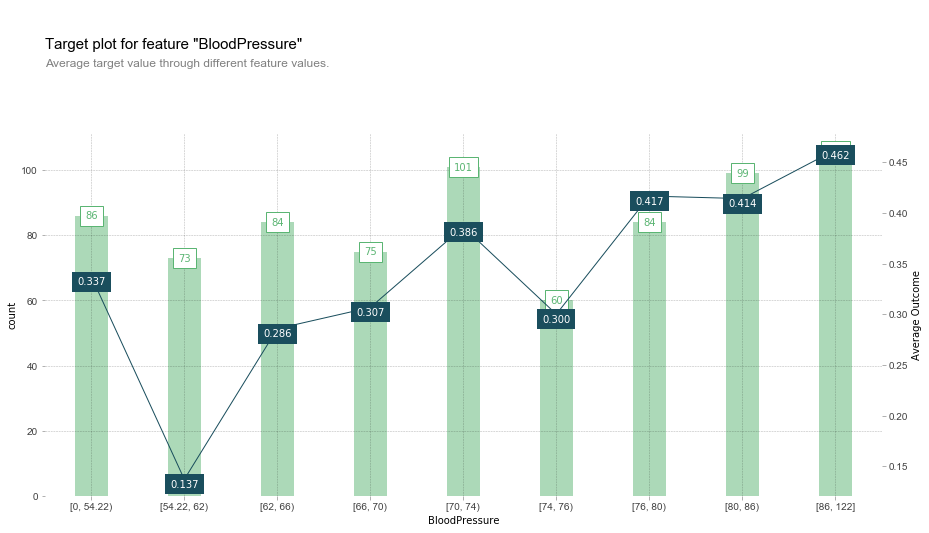

In [16]:
fig, axes, summary_df2 = info_plots.target_plot(
    df = pima_data,
    feature = 'BloodPressure',
    feature_name = 'BloodPressure',
    target = pima_target
)

It is insufficient to conclude that BloodPressure feature and Diabetes have some kind of relationship.

#### actual_plot

C:\Users\anaconda\Anaconda3\lib\site-packages\pdpbox\info_plots.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  info_df['actual_prediction'] = prediction[:, 1]


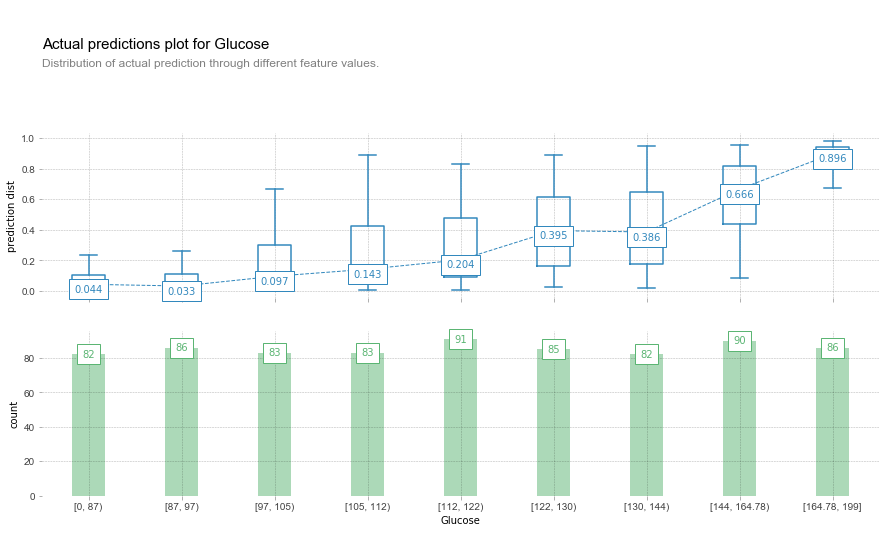

In [17]:
fig, axes, summary_df3 = info_plots.actual_plot(
    model = model,
    X = pima_data[pima_features], 
    feature = 'Glucose',
    feature_name = 'Glucose',
    predict_kwds = {}
)

#### target_plot_interact

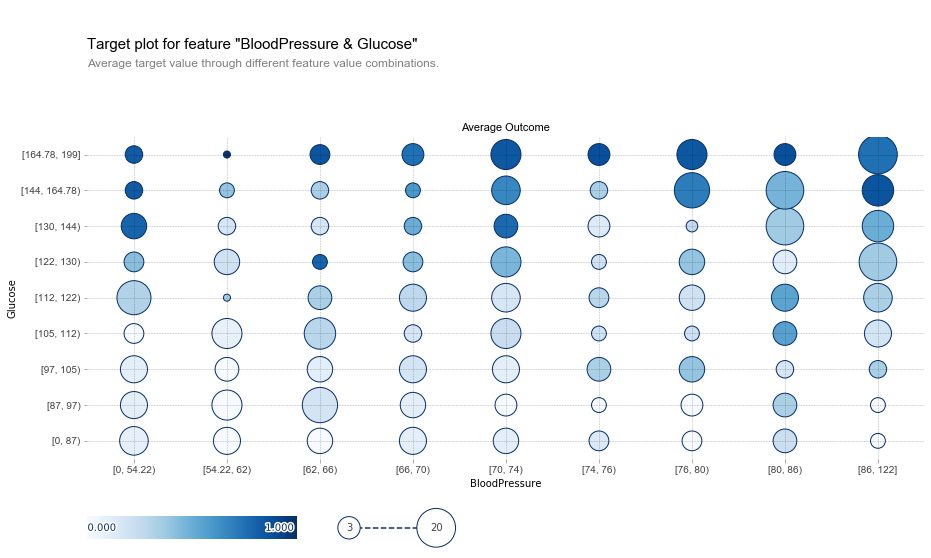

In [18]:
fig, axes, summary_df = info_plots.target_plot_interact(
    df=pima_data,
    features = ['BloodPressure', 'Glucose'],
    feature_names = ['BloodPressure','Glucose'],
    target=pima_target
)

#### pdp_plot 

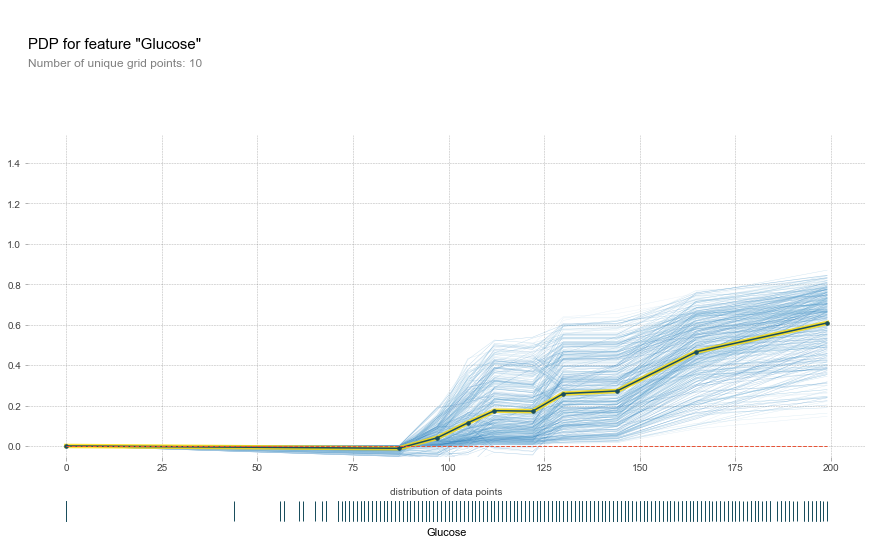

In [19]:
from pdpbox import pdp

pdp_gc = pdp.pdp_isolate(
    model = model,
    dataset = pima_data, 
    model_features = pima_features, 
    feature = 'Glucose'
)

fig, axes = pdp.pdp_plot(
    pdp_gc,
    'Glucose',
    plot_lines = True, 
    frac_to_plot = 0.5,
    plot_pts_dist = True
)

#### pdp_interact

If something strange happens, open the pdp_plot_utils.py file and change 'contour_label_fontsize' to 'fontsize'. 
Then Problem might be solved.

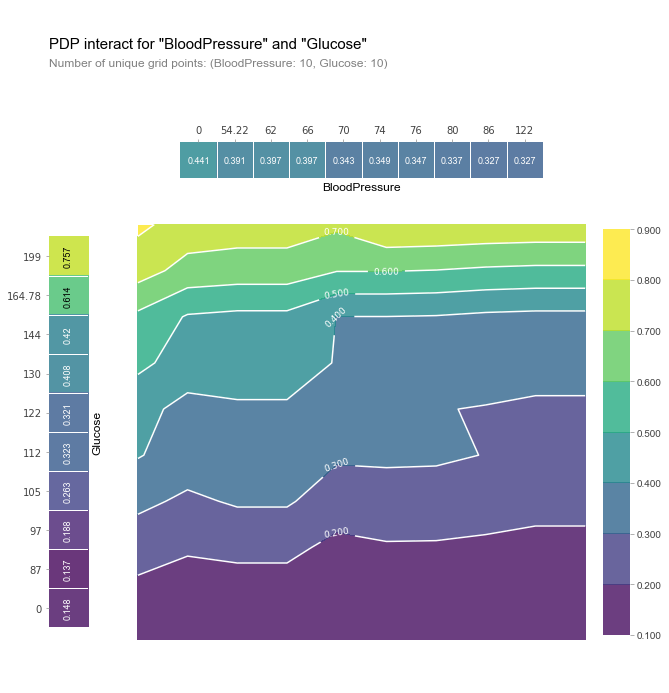

In [20]:
pdp_interaction = pdp.pdp_interact(
    model = model,
    dataset = pima_data, 
    model_features = pima_features, 
    features = ['BloodPressure', 'Glucose']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out = pdp_interaction, 
    feature_names = ['BloodPressure', 'Glucose'],
    plot_type='contour',
    x_quantile=True,
    plot_pdp=True
)

In [21]:
pima_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

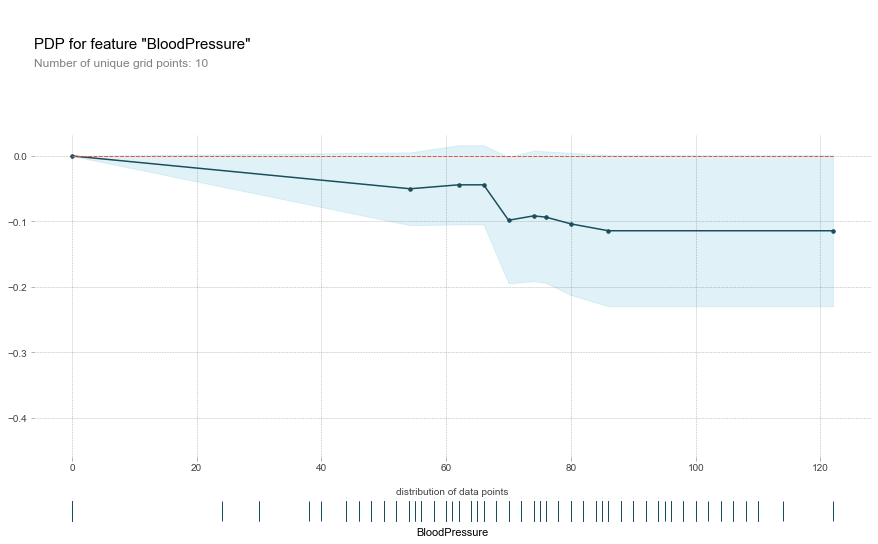

In [22]:
pdp_bp = pdp.pdp_isolate(
    model = model,
    dataset = pima_data,
    model_features = pima_features, 
    feature = 'BloodPressure'
)

fig, axes = pdp.pdp_plot(pdp_bp,
                        'BloodPressure',
                        plot_lines = False,
                        frac_to_plot = 0.5,
                        plot_pts_dist = True
                        )

Contradiction between target_plot and pdp_plot
: That's because pdp_plot fits well in case of there exists interaction as well.